<a href="https://colab.research.google.com/github/tejasri2005/Machine-Learning/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 Rows of Dataset:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Target
0  -0.982525  -0.511483   1.013200   0.972554   0.640058   0.632408       1
1  -0.479618   0.654757   0.505644   0.701173   0.522275   0.597400       1
2   0.476577   0.610051  -0.487033  -0.065750  -0.226488   1.565524       0
3  -1.423574   0.732276   1.486023   1.749577   1.269200  -1.402605       1
4   1.308495  -0.313263  -1.361498  -0.426881  -1.083121  -0.158008       0

Dataset Summary:
        Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     0.024846    0.035862   -0.025342    0.077026   -0.010867    0.084368   
std      1.162833    1.202460    1.205053    1.043111    0.911380    0.943237   
min     -3.804491   -2.712718   -2.671224   -2.896255   -1.634018   -2.696887   
25%     -0.923277   -0.959573   -1.025668   -0.648359   -0.774819   -0.550785   
50%      0.0331

<ipython-input-3-a14279200ea2>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Target'], palette="viridis")


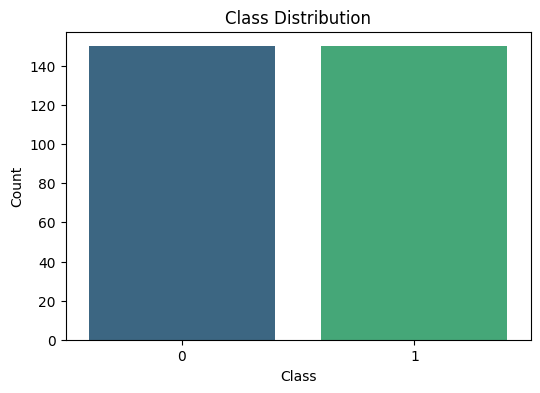

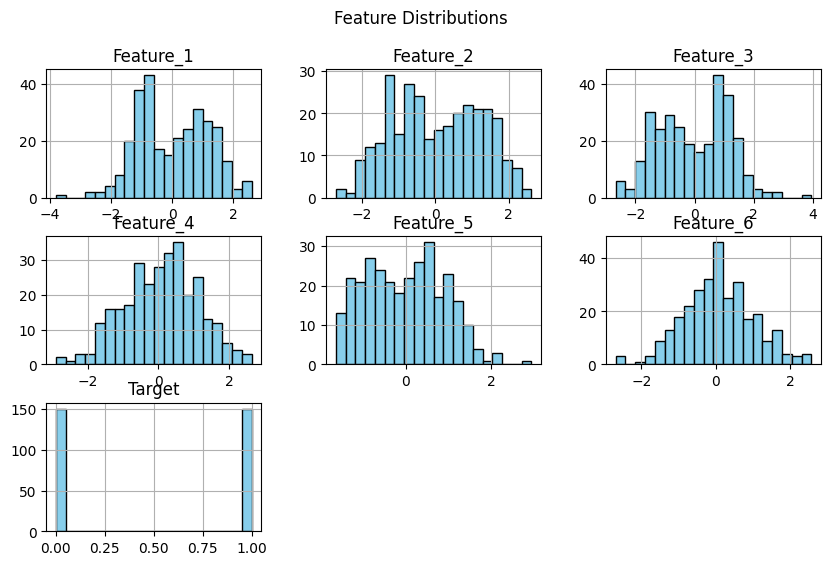

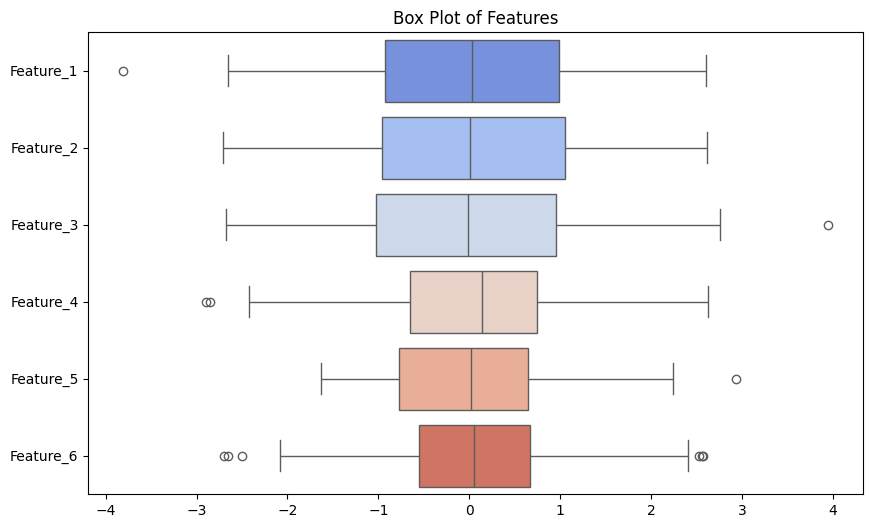

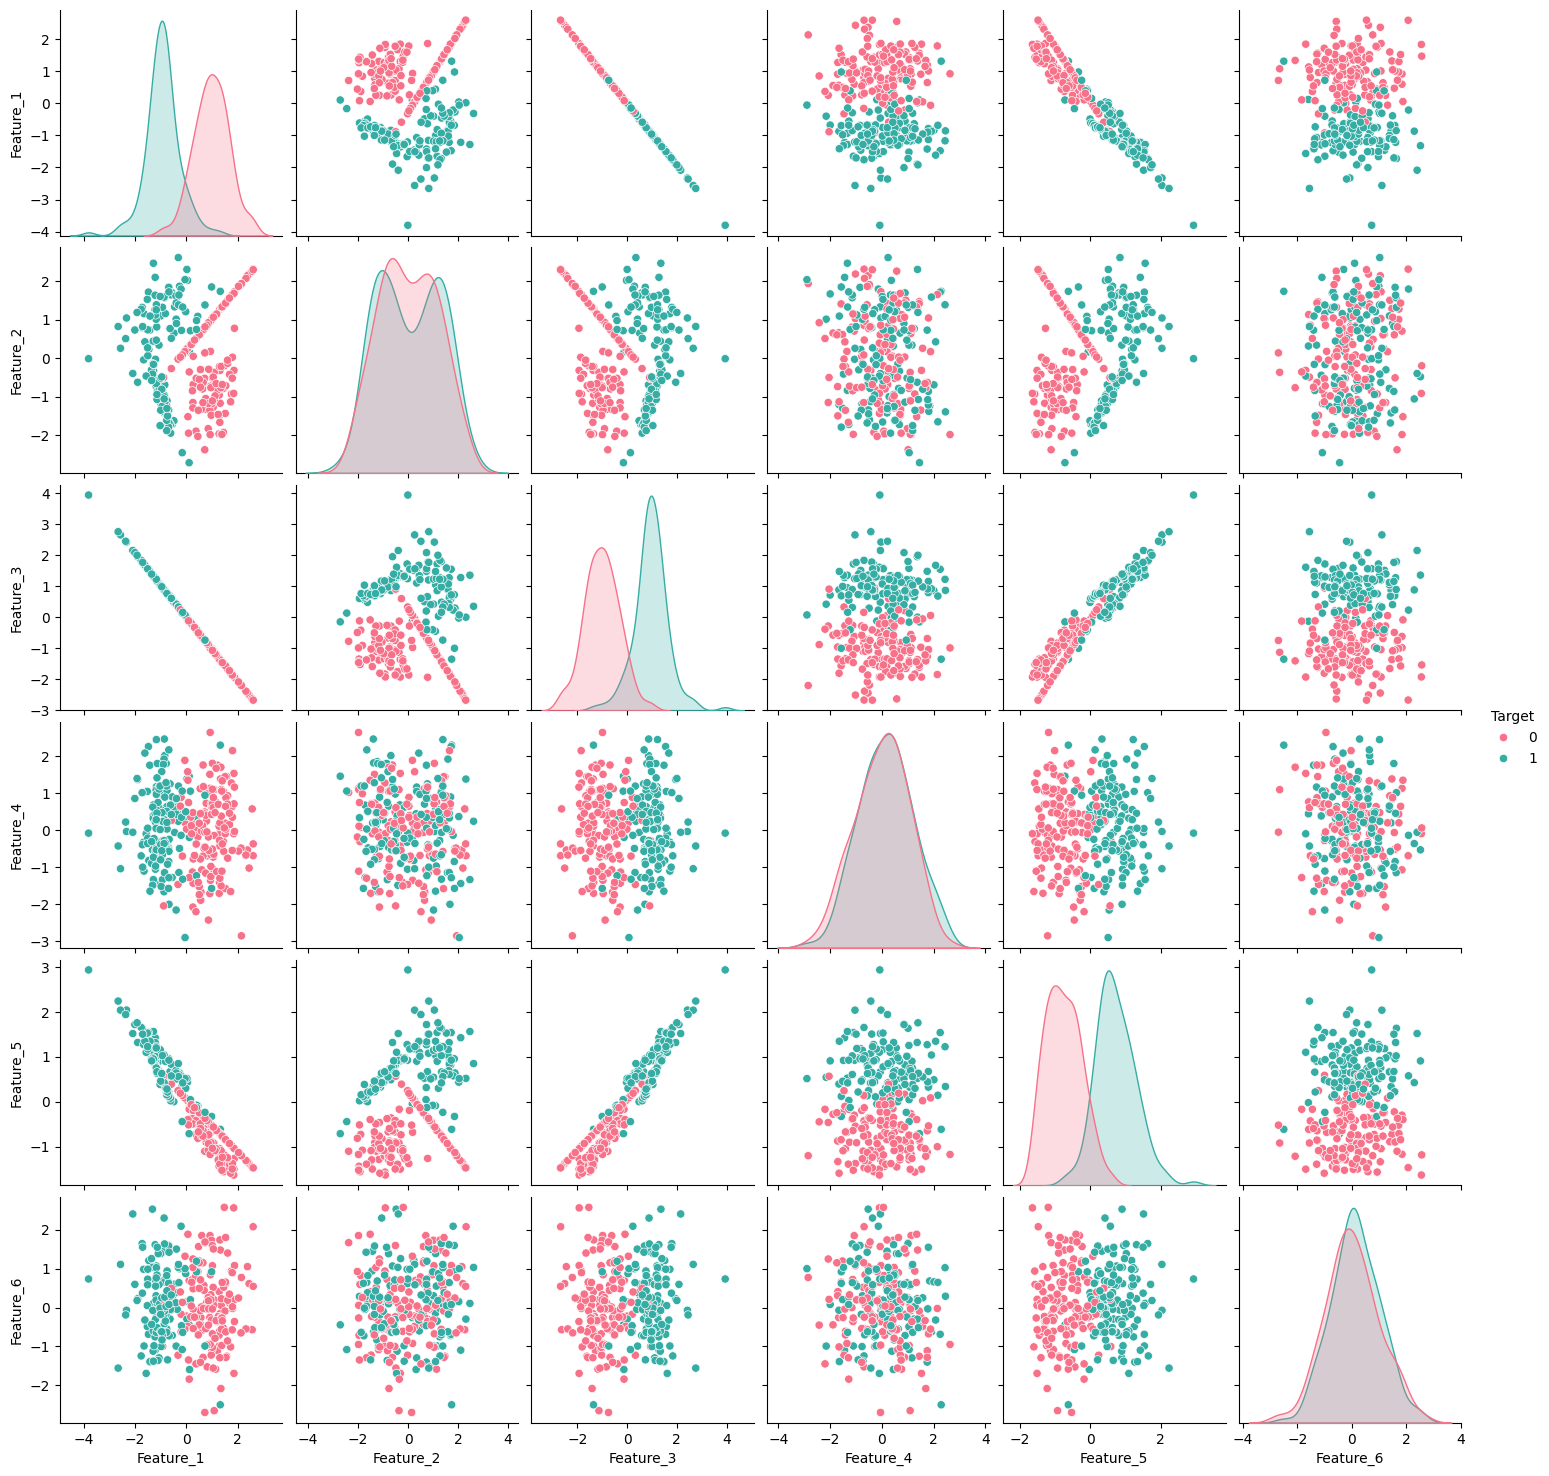

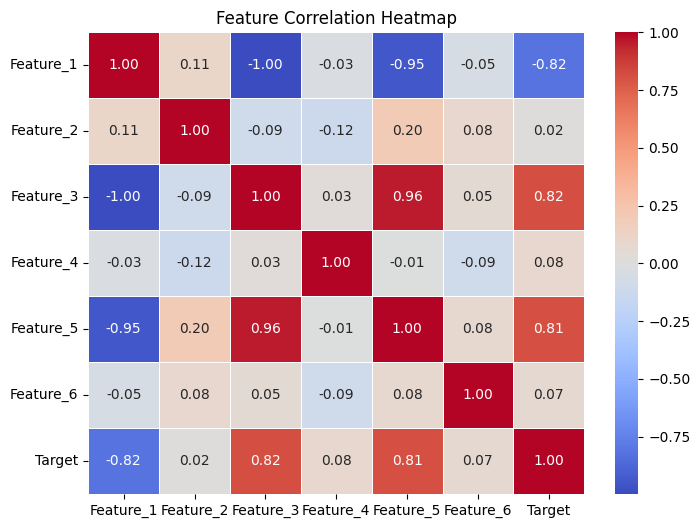


Outlier Count per Feature:
Feature_1    1
Feature_2    0
Feature_3    1
Feature_4    2
Feature_5    1
Feature_6    6
Target       0
dtype: int64

New Feature Added: Feature_Sum

Dataset after Standard Scaling:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Target  \
0  -0.867755  -0.455948   0.863262   0.859951   0.715412   0.581991       1   
1  -0.434548   0.515551   0.441369   0.599351   0.585961   0.544815       1   
2   0.389124   0.478310  -0.383770  -0.137104  -0.236983   1.572914      -1   
3  -1.247677   0.580126   1.256285   1.606104   1.406883  -1.579092       1   
4   1.105742  -0.290827  -1.110648  -0.483888  -1.178483  -0.257391      -1   

   Feature_Sum  
0     1.764211  
1     2.501631  
2     1.872881  
3     2.410896  
4    -2.034276  

EDA Summary:
✔ Dataset Loaded and Checked for Missing Values.
✔ Visualizations for Class Distribution and Feature Relationships Generated.
✔ Correlation and Outliers Detected.
✔ Feature Engineering and Scaling C

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

# 1. Load the Dataset (Simulating a Classification Dataset)
X, y = make_classification(n_samples=300, n_features=6, random_state=42)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Target'] = y

# 2. Data Summary
print("First 5 Rows of Dataset:")
print(df.head())

print("\nDataset Summary:")
print(df.describe())

# 3. Checking for Missing Values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# 4. Class Distribution
print("\nClass Distribution:")
print(df['Target'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x=df['Target'], palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# 5. Feature Visualization
# Histograms
df.hist(figsize=(10, 6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Box Plots for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Target']), orient='h', palette="coolwarm")
plt.title("Box Plot of Features")
plt.show()

# Scatter Plot Matrix
sns.pairplot(df, hue="Target", palette="husl")
plt.show()

# 6. Feature Correlation (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 7. Outlier Detection using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("\nOutlier Count per Feature:")
print(outliers)

# 8. Feature Engineering (Example: Creating a new feature)
df['Feature_Sum'] = df.iloc[:, :-1].sum(axis=1)
print("\nNew Feature Added: Feature_Sum")

# 9. Preprocessing (Feature Scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

print("\nDataset after Standard Scaling:")
print(df_scaled.head())

# 10. Summary
print("\nEDA Summary:")
print("✔ Dataset Loaded and Checked for Missing Values.")
print("✔ Visualizations for Class Distribution and Feature Relationships Generated.")
print("✔ Correlation and Outliers Detected.")
print("✔ Feature Engineering and Scaling Completed.")

